In [1]:
import requests
import datetime
from datetime import date
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

### input raw data

In [2]:
pd.set_option('display.max_columns', None)
df1=pd.read_csv('C:/Users/v-cheha/df1.csv')
df2=pd.read_csv('C:/Users/v-cheha/df2.csv')
df3=pd.read_csv('C:/Users/v-cheha/df3.csv')
df4=pd.read_csv('C:/Users/v-cheha/df4.csv')
df = df1.append(df2).append(df3).append(df4)
df.shape

(19674, 47)

### Clean Data

In [3]:
#df.loc[(df['Acceleration '] >= 97) & (df['Dribbling '] >= 10)]

In [4]:
cols = [0,1,5,9,10,42,43,44,45,46]
df = df.drop(df.columns[cols], axis =1).dropna(subset=['Value '])
df = df[(df['Preferred Positions '] != 'GK')].reset_index(drop=True)
df['Height '] = df['Height '].map(lambda x: x.split(' ')[0]).astype(int)
df['Weight '] = df['Weight '].map(lambda x: x.split(' ')[0]).astype(int)
df['BMI'] = df['Weight '] / (df['Height ']*df['Height ']) * 10000
df['BMI'] = df['BMI'].astype(int)
df['Value '] = df['Value '].str.replace(".", "").str.replace("£", "").astype(int)
df['Wage '] = df['Wage '].str.replace(".", "").str.replace("£", "").astype(int)
df['Deal'] = df['Value '] / df['Wage ']
df['Deal'] = df['Deal'].astype(int)
df = df.reset_index(drop=True)

df.tail(2)

,Height,Weight,Preferred Foot,Age,Preferred Positions,Player Work Rate,Value,Wage,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,BMI,Deal
17284,184,77,Right,22,CM,Medium / Medium,45000,1500,45,40,43,46,45,56,49,37,45,38,39,38,56,53,55,34,60,54,52,54,61,42,40,29,25,38,32,40,30,22,30
17285,185,70,Right,21,ST,Medium / Medium,50000,1500,50,47,28,25,25,33,45,42,25,36,43,24,35,33,55,48,53,43,57,45,33,45,43,42,37,32,30,43,30,20,33


In [5]:
df['Player Work Rate '].describe()

count               17286
unique                  9
top       Medium / Medium
freq                 8071
Name: Player Work Rate , dtype: object

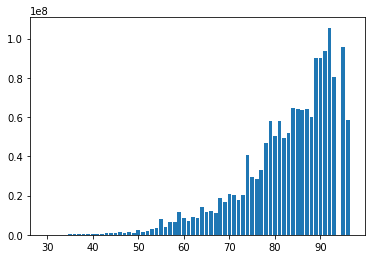

In [7]:
plt.bar(df['Reactions '], df['Value '])

plt.show()

In [ ]:
plt.bar(df['Acceleration '], df['Value '])

plt.show()

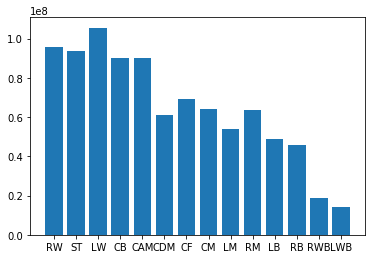

In [65]:
plt.bar(df['Preferred Positions '], df['Value '])

plt.show()

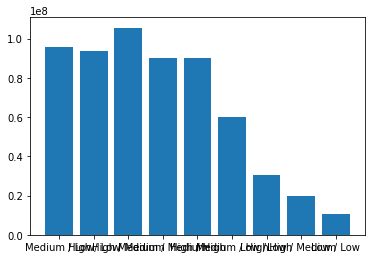

In [67]:
plt.bar(df['Player Work Rate '], df['Value '])

plt.show()

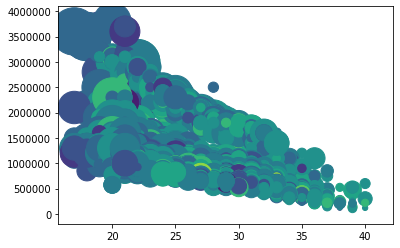

In [77]:
plt.scatter(df['Age '], df['Value '], s=df['Deal'], c=df['BMI'])
plt.xlabel=('Age')
plt.show()

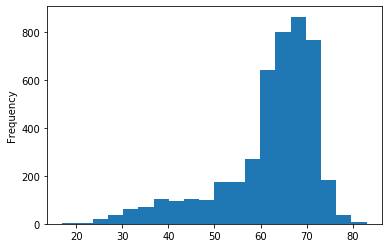

In [55]:
df['Dribbling '].plot(kind='hist', bins=20)
#plt.xlabel='player value'
plt.show()

### useful exploration https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

In [45]:
corr = df.corr(method ='pearson') 

#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

<Figure size 360x360 with 0 Axes>

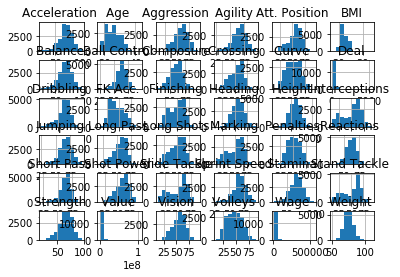

In [57]:
from matplotlib.pyplot import figure
#figure(num=None, figsize=(200, 200), dpi=80, facecolor='w', edgecolor='k')
plt.figure(figsize=(5,5))
df.hist()
plt.show()

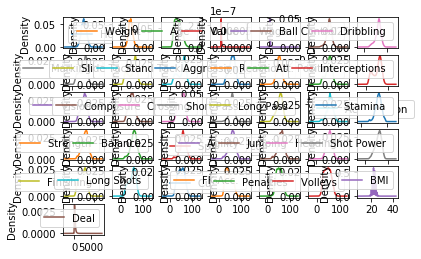

In [60]:
df.plot(kind='density', subplots=True, layout=(6,7), sharex=False)
plt.show()

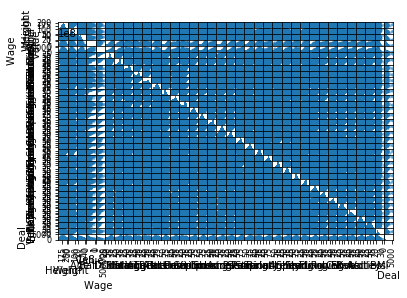

In [53]:
## Warning: It takes long time to run

from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

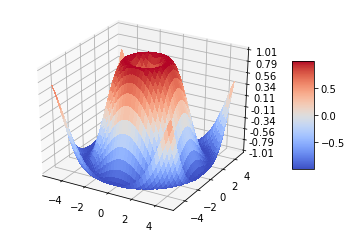

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()